In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
style.use('dark_background')

In [11]:
df = pd.read_csv('bitcoinfinal.csv', header=None)
df.columns = ['Month','Price']
# df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df = df.set_index('Month')
df

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


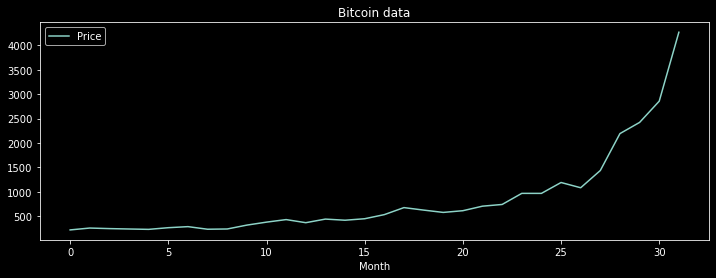

In [12]:
df.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Bitcoin data')
plt.show(block=False)

In [16]:
train_len = 29
train = df[0:train_len]
test = df[train_len:]

In [17]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

In [18]:
y_hat_naive

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


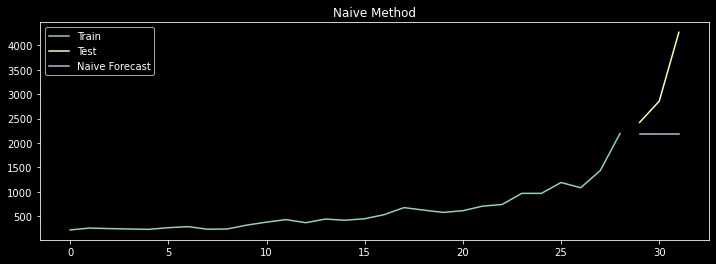

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label = 'Naive Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Naive Method')
plt.show()

In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

In [21]:
y_hat_avg

,Price,avg_forecast
Month,,
29,2420.7,595.751724
30,2856.0,595.751724
31,4268.8,595.751724


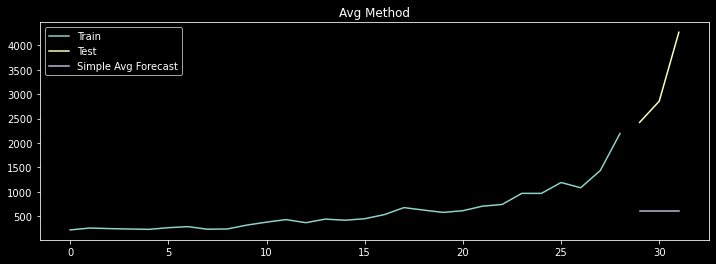

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label = 'Simple Avg Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Avg Method')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_naive['naive_forecast'])/test['Price'])*100,2)
#Mape is in percentage
results = pd.DataFrame({'Method' : ['Naive method'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = results[['Method', 'MAPE', 'RMSE']]
results
#Mape 23.63 implies model is 76.37% accurate

,Method,MAPE,RMSE
0,Naive method,27.12,1265.9


In [24]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_avg['avg_forecast'])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['Simple avg method'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results,tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
